# 比较、掩码和布尔逻辑

基于某些准则抽取、修改、计数或对一个数组中的值进行其他操作时  
可以利用掩码

## 1. 示例：统计下雨天数

In [1]:
import numpy as np 
import pandas as pd 

# 利用pandas抽取降雨量，放入一个numpy数组
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

(365,)

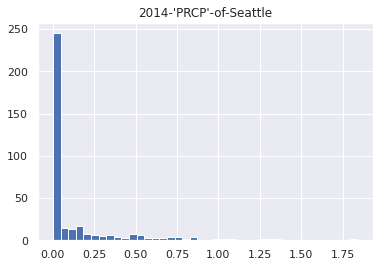

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()

plt.hist(inches, 40)
plt.title("2014-'PRCP'-of-Seattle");


## 2.和通用函数类似的比较操作

In [3]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [4]:
x > 3

array([False, False, False,  True,  True])

In [5]:
x <= 3

array([ True,  True,  True, False, False])

In [6]:
x >= 3

array([False, False,  True,  True,  True])

In [7]:
x != 3

array([ True,  True, False,  True,  True])

In [8]:
x == 3

array([False, False,  True, False, False])

**用复合表达式实现对两个数组的逐元素比较**

In [9]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

| 运算符 | 对应的通用函数 |
|--------|----------------|
| ==     | np.equal       |
| !=     | np.not__equal  |
| <      | np.less        |
| <=   | np.less_equal           |
| >   | np.greater           |
| >=   | np.greater_equal           |


In [10]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [11]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## 3.操作布尔数组

In [12]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### 3.1 统计记录的个数

统计布尔数组中True的个数，用np.count_nonzero()

In [13]:
np.count_nonzero(x < 6)

8

等效于np.sum(),True会被解释成1,False会被解释成0

In [14]:
np.sum(x < 6)

8

sum可以沿着行或列进行

In [15]:
np.sum(x < 6, axis=1) #shape: (3, 4) -> (3, 1)

array([4, 2, 2])

**要检查任意或者所有这些值是否为True，可以用np.any()或np.all()**

In [16]:
# 有没有值大于8？
np.any(x > 8)

True

In [17]:
# 是否所有值小于10？
np.all(x < 10)

True

In [18]:
np.all(x < 8, axis=1)

array([ True, False,  True])

### 3.2 布尔运算符

逐位逻辑运算符&, |, ^, ~来实现

In [19]:
np.sum((inches > 0.5) & (inches < 1))

29

In [20]:
# 等价于
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

| 运算符 | 对应通用函数   |
|--------|----------------|
| &      | np.bitwise_and |
| \|     | np.bitwise_or  |
| ^      | np.bitwise_xor |
|~        | np.bitwise_not           |


**利用掩码和聚合实现对天气数据分析**

In [21]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches: ", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches:  37
Rainy days with < 0.1 inches:  75


## 4.将布尔数组作为掩码

掩码：对数组中的值进行按位&，|，^，～

In [22]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [23]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

**用掩码操作对x进行索引**

In [24]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [25]:
# 为所有下雨天创造一个掩码
rainy = (inches > 0)

# 构建一个包含整个夏季日期的掩码,6月21日是172天
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ", 
     np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", 
     np.median(inches[summer]))
print("Maximum precip on summer days in 1024 (inches): ", 
     np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches): ", 
     np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 1024 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches):  0.20078740157480315


**and和or判断整个对象的真假，而&和|指每个对象中的比特位**

In [26]:
bool(42), bool(0)

(True, False)

In [27]:
bool(42 and 0)

False

In [28]:
bool(42 or 0)

True

In [29]:
bin(42) # 101010B

'0b101010'

In [30]:
bin(59) # 111011B

'0b111011'

In [31]:
bin(42 & 59) # 按位与运算

'0b101010'

In [32]:
bin(42 | 59) # 按位或运算

'0b111011'

**将Numpy中的布尔数组当作由比特字符组成的**

In [33]:
a = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
b = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
a | b

array([ True,  True,  True, False,  True,  True])

In [34]:
a or b # 计算整个数组的真假，导致程序出错

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

对给定数组进行逻辑运算时，应该用|或者&，而不是and，ork

In [37]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [38]:
(x > 4) and (x < 8) #计算整个数组的真假会报错

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

总结：and和or对整个对象执行单个布尔运算，而&和|对一个对象的内容  
（单个比特或字节）执行多个布尔运算，对于Numpy数组，常用位运算